Shahar Dvir 🧮

Gal Mishan ⚽

Tal Sadot ⛽

Tomer Erez 👑


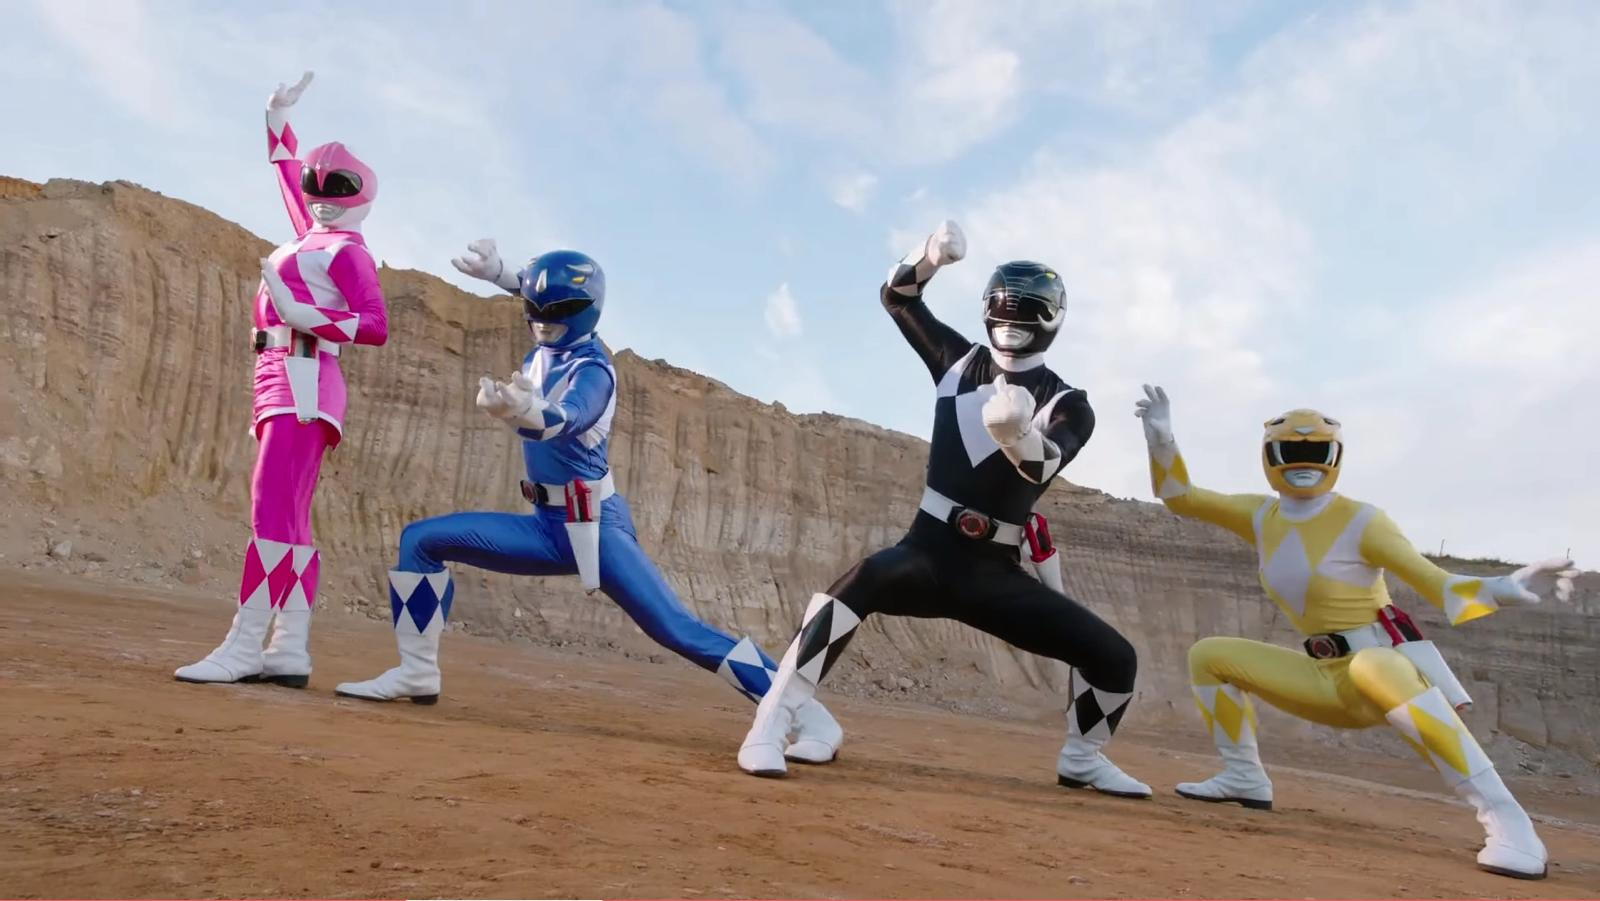

# Assignment II - NLP: Seinfeld or Friends?

## Section 1:
Build and train a model, and then test it on the test set.

Let's load the data:

In [ ]:
import pandas as pd
base_train_df = pd.read_csv('https://raw.githubusercontent.com/odedovadia/AdvancedMLDLCourse/main/Assignments/Assignment%20II%20-%20NLP/train.csv')
train_df = pd.read_csv('https://raw.githubusercontent.com/odedovadia/AdvancedMLDLCourse/main/Assignments/Assignment%20II%20-%20NLP/train.csv')


In [ ]:
train_df.head()

,Dialogue,Character,Episode,Show,Dialogue_length
0,Hey.,joey,Season-07 Episode-13-The One Where Rosita Dies,Friends,1
1,(to Joey) Are you gonna be embarrassed going ...,phoebe,Season-10 Episode-04-The One With The Cake,Friends,13
2,"Me? No no no, you. You're gonna tell him. I'm ...",elaine,S03E22,Seinfeld,14
3,Alright you guys are off to party number one ...,chandler,Season-02 Episode-22-The One With the Two Parties,Friends,56
4,Am I? Or am I so sane that you just blew your ...,kramer,S05E12,Seinfeld,13


EDA

We will check whether the classes are evenly distributed:

In [ ]:
train_df['Show'].value_counts()

Friends     39092
Seinfeld    31313
Name: Show, dtype: int64

You can see that the data contains more sentences from "friends"

We will check who is the character that appears the most times in the data

In [ ]:
train_df['Character'].value_counts()

jerry       11767
george       7781
ross         7115
rachel       6995
joey         6434
chandler     6432
elaine       6380
monica       6377
phoebe       5739
kramer       5385
Name: Character, dtype: int64

It can be seen that Jerry from "Seinfeld" has the most sentences in the data. This makes sense since every episode of Seinfeld opens with a stand-up segment that he hosts.

## Non-verbal segments
We would like to investigate whether non-verbal segments in the text such as intonations can help in characterizing the series and the characters.

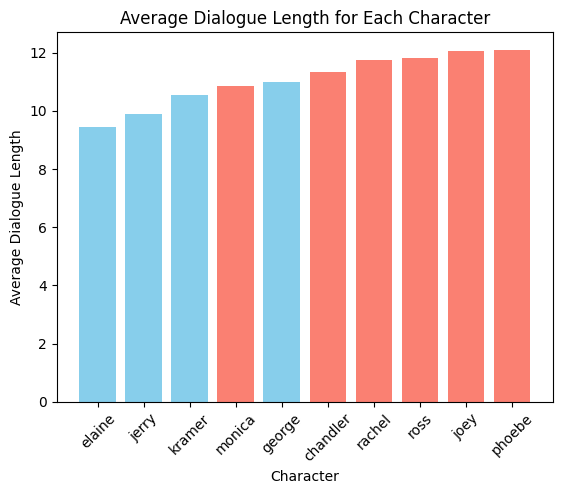

In [ ]:
import matplotlib.pyplot as plt

friends_characters = ["ross", "rachel", "monica", "chandler", "joey", "phoebe"]

# Calculate average dialogue length for each character
avg_dialogue_length = train_df.groupby('Character')['Dialogue_length'].mean()

# Sort characters by average dialogue length
avg_dialogue_length_sorted = avg_dialogue_length.sort_values()

# Plot the histogram
for character in avg_dialogue_length_sorted.index:
    color = 'salmon' if character.lower() in friends_characters else 'skyblue'
    plt.bar(character, avg_dialogue_length_sorted[character], color=color)

plt.title('Average Dialogue Length for Each Character')
plt.xlabel('Character')
plt.ylabel('Average Dialogue Length')
plt.xticks(rotation=45)
plt.show()

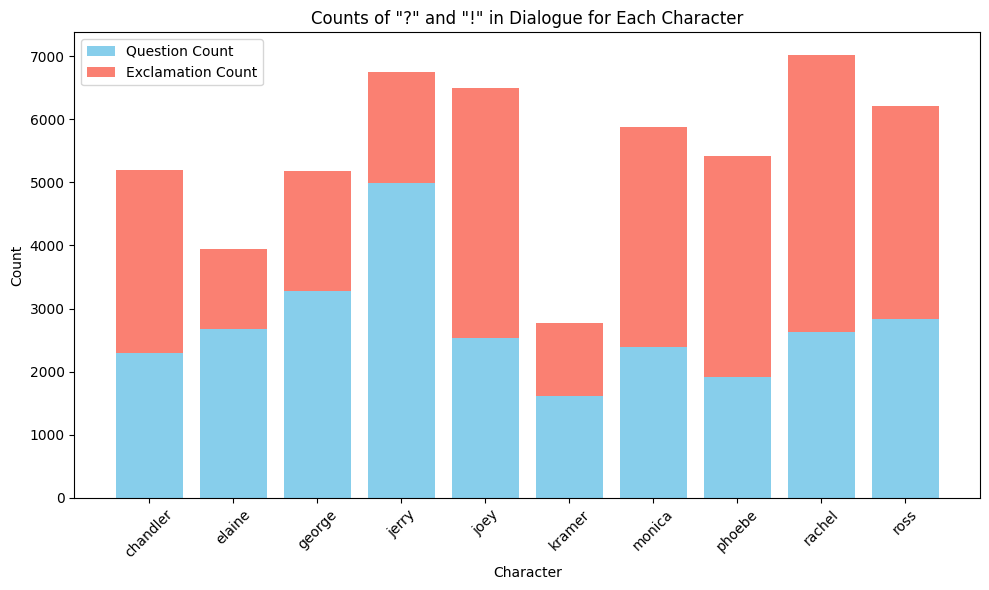

In [ ]:
# Define a function to count '?' and '!'
def count_question_and_exclamation(text):
    question_count = text.count('?')
    exclamation_count = text.count('!')
    return question_count, exclamation_count

# Group by 'character' column and apply the counting function
counts = train_df.groupby('Character')['Dialogue'].apply(lambda x: count_question_and_exclamation(' '.join(x)))

# Create a new DataFrame to store the counts
counts_df = pd.DataFrame(counts.tolist(), index=counts.index, columns=['Question_Count', 'Exclamation_Count'])

import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for question counts
plt.bar(counts_df.index, counts_df['Question_Count'], color='skyblue', label='Question Count')

# Bar plot for exclamation counts
plt.bar(counts_df.index, counts_df['Exclamation_Count'], color='salmon', label='Exclamation Count', bottom=counts_df['Question_Count'])

# Adding labels and title
plt.title('Counts of "?" and "!" in Dialogue for Each Character')
plt.xlabel('Character')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

## Exploring the appearnces of names in the dataset

we realized the importance of name context in the data set. if a sentence contains the name gunther, it definetly came from Friends

In [ ]:
Friends_names = [
    'Monica', 'Geller',
    'Joey' ,'Tribbiani',
    'Chandler', 'Bing',
    'Rachel', 'Green',
    'Phoebe' ,'Buffay',
    'Ross' ,'Geller',
    "Gunther",
    "Janice",
    'Mike' ,'Hannigan',
    'Ursula', 'Buffay',
    'Richard' ,'Burke',
    'Estelle' ,'Costanza',
    'Ben' ,'Geller',
    'Emily' ,'Waltham',
    'Heckles'
]

In [ ]:
Seinfeld_names = ['Jerry', 'Seinfeld',
'George', 'Costanza',
'Cosmo' ,'Kramer'
'Elaine', 'Benes' ,
'Newman',
'Frank', 'Costanza',
 'Peterman' ,
'Estelle' ,
'Soup Nazi',
'Steinbrenner',
'Kenny' ,'Bania',
'Lloyd' ,'Braun']

In [ ]:
all_names = Seinfeld_names+Friends_names

In [ ]:
from collections import Counter
name_counts_Seinfeld = Counter()
name_counts_Friends = Counter()

for name in Seinfeld_names:
  name_counts_Friends[name] = train_df[train_df['Show'] == 'Friends']['Dialogue'].str.contains(name).sum()
  name_counts_Seinfeld[name] = train_df[train_df['Show'] == 'Seinfeld']['Dialogue'].str.contains(name).sum()


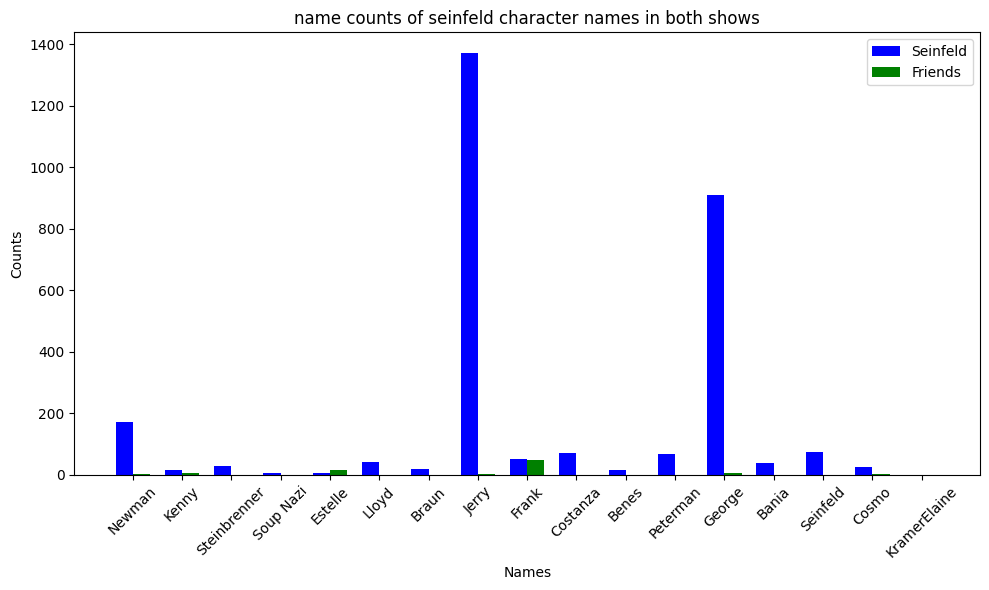

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Merge the dictionaries
merged_counts = {}
for name in set(name_counts_Seinfeld.keys()) | set(name_counts_Friends.keys()):
    count_Seinfeld = name_counts_Seinfeld.get(name, 0)
    count_Friends = name_counts_Friends.get(name, 0)
    merged_counts[name] = (count_Seinfeld, count_Friends)

# Extracting names and counts
names = list(merged_counts.keys())
counts_Seinfeld, counts_Friends = zip(*merged_counts.values())

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(names))

bar1 = ax.bar(index, counts_Seinfeld, bar_width, label='Seinfeld', color='b')
bar2 = ax.bar(index + bar_width, counts_Friends, bar_width, label='Friends', color='g')

ax.set_xlabel('Names')
ax.set_ylabel('Counts')
ax.set_title('name counts of seinfeld character names in both shows')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(names)
ax.legend()

plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
name_counts_Seinfeld = Counter()
name_counts_Friends = Counter()

for name in Friends_names:
  name_counts_Friends[name] = train_df[train_df['Show'] == 'Friends']['Dialogue'].str.contains(name).sum()
  name_counts_Seinfeld[name] = train_df[train_df['Show'] == 'Seinfeld']['Dialogue'].str.contains(name).sum()

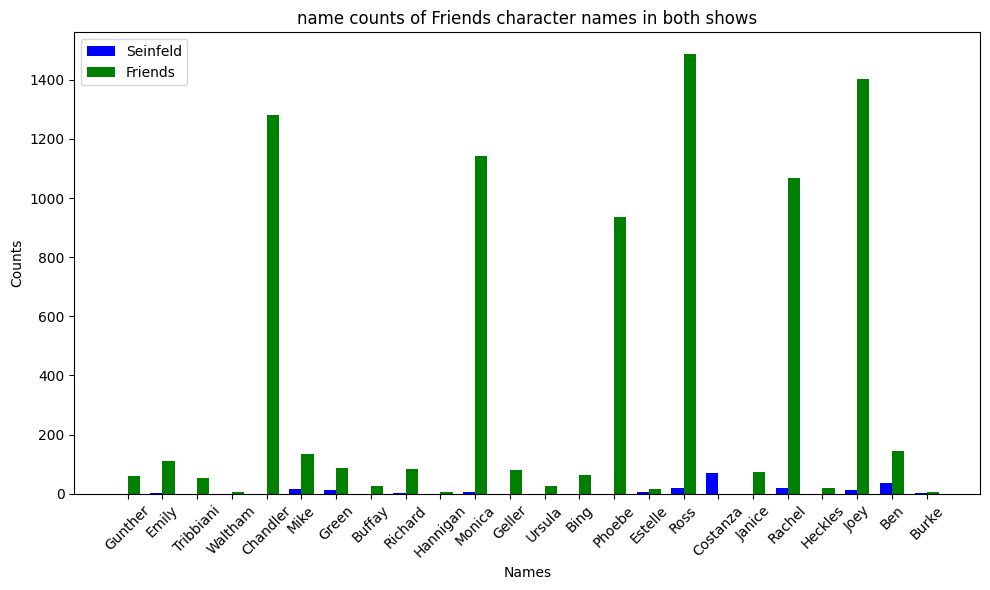

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Merge the dictionaries
merged_counts = {}
for name in set(name_counts_Seinfeld.keys()) | set(name_counts_Friends.keys()):
    count_Seinfeld = name_counts_Seinfeld.get(name, 0)
    count_Friends = name_counts_Friends.get(name, 0)
    merged_counts[name] = (count_Seinfeld, count_Friends)

# Extracting names and counts
names = list(merged_counts.keys())
counts_Seinfeld, counts_Friends = zip(*merged_counts.values())

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(names))

bar1 = ax.bar(index, counts_Seinfeld, bar_width, label='Seinfeld', color='b')
bar2 = ax.bar(index + bar_width, counts_Friends, bar_width, label='Friends', color='g')

ax.set_xlabel('Names')
ax.set_ylabel('Counts')
ax.set_title('name counts of Friends character names in both shows')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(names)
ax.legend()

plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

# Data preprocessing

## Cleaning the data
Let's cleaning the text and removing HTML junk:

In [ ]:
import re
cnt =0
html_tags = re.compile(r'<.*?>')
for i in range(0,len(train_df),5):
    text = train_df.loc[i]['Dialogue']
    if html_tags.search(text):
      cnt+=1
      print(f"Angled brackets found in row {i}: {text}")
cnt

Angled brackets found in row 620: No, George, this is the ticket-<holders> line.
Angled brackets found in row 47905:  Oh no no no.. I'll get her. I'm super-compentent and totally responsibile and fourth in line to raise Emma. I'll be right there Emma. Just let me get my trusty diaper bag here. <knocks over the box of china> Well.. what do you know? I guess, I'll be the one who dies first.
Angled brackets found in row 48620: I wouldn't mind seein' <that>.


3

between each <>, (),[] is a director instruction or actions that the actors do, but these are not speeches that can tell which actor said it. so we will delete everything between brackets but keep the names! we think that names can help our models identify who said which sentence.

In [ ]:
import re

def replace_enclosed_text_with_names(text, all_names):
    # Define regular expression pattern to match text enclosed within parentheses, square brackets, or angle brackets
    pattern = r'\[([^\[\]]*)\]|\(([^()]*)\)|<([^<>]*)>'  # Updated pattern to include parentheses, square brackets, and angle brackets

    def replace_with_names(match):
        # Extract enclosed text from groups
        enclosed_text = match.group(1) if match.group(1) else match.group(2) if match.group(2) else match.group(3)
        # Check if any names from all_names are present in the enclosed text
        found_names = [name for name in all_names if name in enclosed_text] if enclosed_text else []
        if found_names:
            return ' '.join(found_names)  # Replace with the found names
        else:
            return ''  # If no matching name found, replace with an empty string

    # Use re.sub() with a custom function to replace matched patterns with names from all_names
    cleaned_text = text
    while re.search(pattern, cleaned_text):
        cleaned_text = re.sub(pattern, replace_with_names, cleaned_text)

    return cleaned_text

def clean_dialogue(dialogue):
    cleaned_dialogue = replace_enclosed_text_with_names(dialogue, all_names)
    return cleaned_dialogue

In [ ]:
# pipeline
# Apply the cleaning function to the 'Dialogue' column
train_df['Dialogue'] = train_df['Dialogue'].apply(clean_dialogue)


In [ ]:
print(train_df.iloc[3,0])
print(base_train_df.iloc[3,0])

 Alright you guys are off to party number one Monica and you, you are off to party number two Monica Chandler Alright fellas, let's keep it movin', let' keep it movin.
 Alright you guys are off to party number one [ushers 3 guys into Monica's apartment] and you, you are off to party number two [ushers four women into his apartment. Two guys try to follow and Chandler blocks them and shoos them off to Monica's apartment] Alright fellas, let's keep it movin', let' keep it movin.


In [ ]:
# pipeline
# Convert the 'dialogue' column to lowercase
train_df['Dialogue'] = train_df['Dialogue'].str.lower()

In [ ]:
# pipeline
# convert the names list to lower
all_names = [string.lower() for string in all_names]


## Lemmatization

To improve our Text Analysis we will use Lemmatization. We will reducing words to their base or root form and thus reduce the dimension of the problem.

In [ ]:
import spacy
# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
import spacy
from concurrent.futures import ProcessPoolExecutor
from tqdm.notebook import tqdm  # For progress tracking

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to lemmatize a batch of texts
def lemmatize_batch(texts):
    docs = list(nlp.pipe(texts))
    lemmatized_texts = [' '.join([token.lemma_ for token in doc]) for doc in docs]
    return lemmatized_texts

# Function to lemmatize texts using multiprocessing
def lemmatize_texts_multiprocessing(texts, batch_size=1000, num_processes=None):
    with ProcessPoolExecutor(max_workers=num_processes) as executor:
        batches = [texts[i:i+batch_size] for i in range(0, len(texts), batch_size)]
        results = list(tqdm(executor.map(lemmatize_batch, batches), total=len(batches), desc="Lemmatizing"))
        lemmatized_texts = [text for result in results for text in result]
    return lemmatized_texts

# Modify your DataFrame processing
def process_dataframe(df):
    # Assuming train_df is your DataFrame
    dialogue_texts = df["Dialogue"].tolist()
    lemmatized_texts = lemmatize_texts_multiprocessing(dialogue_texts)
    df["Dialogue"] = lemmatized_texts
    return df

In [ ]:
# pipeline
# lemmatize the entire dataset with multiprocessibng for faster comput time
train_df = process_dataframe(train_df)

Lemmatizing:   0%|          | 0/71 [00:00<?, ?it/s]

In [ ]:
print(train_df.iloc[3397,0])
print(base_train_df.iloc[3397,0])
print('\nchose -> choose, cats -> cat')

he choose the cat ?
He chose the cats?

chose -> choose, cats -> cat


## Removing stop words
 these are words that don't help us determine who said which sentence and just make the dimension of our data larger

In [ ]:
import nltk

_=nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')

print('Number of English stop words:', len(stopword_list))
print(stopword_list)





Number of English stop words: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'onl

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In order to  remove these words from our text  we need to create a ToktokTokenizer instace:

In [ ]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()

In [ ]:
tokenizer.tokenize(train_df.iloc[3397, 0])

['he', 'choose', 'the', 'cat', '?']

In [ ]:
# Removing the stopwords
from tqdm.notebook import tqdm
tqdm.pandas()

def remove_stopwords(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text



In [ ]:
# pipeline
# Apply function on review column
train_df['Dialogue'] = train_df['Dialogue'].progress_apply(remove_stopwords)

  0%|          | 0/70405 [00:00<?, ?it/s]

the generic stop words were removed: are, you, be... for example removed he , the

In [ ]:
print(train_df.iloc[3397,0])
print(base_train_df.iloc[3397,0])

choose cat ?
He chose the cats?


Let's also remove special characters:

In [ ]:
# Define function for removing special characters
def remove_special_characters(text):
    pattern = r'[^a-z\s]'
    text = re.sub(pattern,'',text)
    return text

In [ ]:
# pipeline
# Apply function on review column
train_df['Dialogue'] = train_df['Dialogue'].apply(remove_special_characters)

In [ ]:
print(train_df.iloc[3397,0])
print(base_train_df.iloc[3397,0])


choose cat 
He chose the cats?


In [ ]:
print(train_df.iloc[4975, 0])
print(base_train_df.iloc[4975, 0])



come  like want tell  run place try make sure happen 
 Come on! Like I wanted him to tell you, I ran all over the place trying to make sure that didn’t happen!


convert multiple spaces to 1

In [ ]:
# pipeline
train_df["Dialogue"] = train_df["Dialogue"].apply(lambda x: re.sub(r'\s+', ' ', x))

In [ ]:
# pipeline
train_df["Dialogue"] = train_df["Dialogue"].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))

In [ ]:
print(train_df.iloc[5246, 0])
print(base_train_df.iloc[5246, 0])

nothing except bird run giant freak head
Nothing.. Except that a bird ran into my giant freak-head. (Sits down)


validating that we handled the data correctly




In [ ]:
train_df.head(10)

,Dialogue,Character,Episode,Show,Dialogue_length
0,hey,joey,Season-07 Episode-13-The One Where Rosita Dies,Friends,1
1,joey go embarrassed go nothing prepare,phoebe,Season-10 Episode-04-The One With The Cake,Friends,13
2,go tell go tell noo,elaine,S03E22,Seinfeld,14
3,alright guy party number one monica party numb...,chandler,Season-02 Episode-22-The One With the Two Parties,Friends,56
4,sane blow mind,kramer,S05E12,Seinfeld,13
5,parent got divorce able answer question like n...,monica,Season-03 Episode-17-The One Without The Ski Trip,Friends,18
6,,ross,Season-05 Episode-18-The One Where Rachel Smokes,Friends,2
7,know know try get young mindset know start flow,chandler,Season-09 Episode-15-The One With The Mugging,Friends,27
8,know always want first black man cross atlantic,chandler,Season-10 Episode-15-The One Where Estelle Dies,Friends,15
9,uniform make,george,S06E01,Seinfeld,6


rows that only contained data that needed to be removed are nop null (only stop words, special chars...)

In [ ]:
train_df["Dialogue"][6]

''

In [ ]:
train_df = train_df[train_df["Dialogue"] != ""]


In [ ]:
for i in range(1,250,10):
  print(train_df["Dialogue"][i])


joey go embarrassed go nothing prepare
forty five minute ticket musicman
well say hump screw front b b
yes well yes
hello talk audition til joey chandler well nobody tell talk chandler nevermind
hey uh okay come
look way dump right mean woman unbelievably sexy beautiful intelligent unattainable tell
okay time quit
monica
impossible
hell
give hand string gimme pick want learn play guitar
find
glass fat
hmm hmm ross
well get comfortable soon seth get real job two gong back chicken supernova
ross surprise party rachel
tell david
go one popular got ride chip motorcycle wear letterman jacket go one wear band uniform specially make
know son
already
uh mona go
know jerry give
right
ooh yeah go anywhere


### Now we finished pre processing our data






 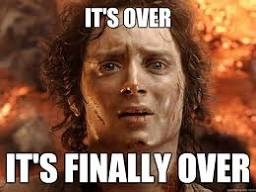

# Train-test-valdiation split

In [ ]:
X = train_df['Dialogue']
Y = train_df['Show']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=88)

In [ ]:
train_label_count = y_train.value_counts()
test_label_count = y_test.value_counts()
print(train_label_count)
print(test_label_count)

Friends     29979
Seinfeld    23732
Name: Show, dtype: int64
Friends     7462
Seinfeld    5966
Name: Show, dtype: int64


Let's split the test set to test and validation:

In [ ]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)
print('x_val shape:', x_val.shape)
print('y_val shape:', y_val.shape)

x_train shape: (53711,)
y_train shape: (53711,)
x_test shape: (6714,)
y_test shape: (6714,)
x_val shape: (6714,)
y_val shape: (6714,)


# TF-IDF


We will use TF IDF in order to convert the data to a numerical format and find how many unique words are there

In [ ]:
# Combine all dialogue strings into a single string
all_dialogues = ' '.join(train_df['Dialogue'])

# Tokenize the combined string into words
words = all_dialogues.split()

# Get the count of unique words
unique_word_count_train = len(set(words))

# Combine all dialogue strings into a single string
all_dialogues = ' '.join(base_train_df['Dialogue'])

# Tokenize the combined string into words
words = all_dialogues.split()

# Get the count of unique words
unique_word_count_base = len(set(words))

print(f'originally the dataset had {unique_word_count_base} unique words, after processing it has {unique_word_count_train}')


originally the dataset had 59987 unique words, after processing it has 14798


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(analyzer='word', max_features=5000)

# Fit and transform on the training set
x_train_tv = tv.fit_transform(x_train)

# Transform the test and validation sets
x_test_tv = tv.transform(x_test)
x_val_tv = tv.transform(x_val)

print('x_train_tv:', x_train_tv.shape)
print('x_test_tv:', x_test_tv.shape)
print('x_val_tv:', x_val_tv.shape)

x_train_tv: (53711, 5000)
x_test_tv: (6714, 5000)
x_val_tv: (6714, 5000)


The score each word received in the first sentence in the data:

In [ ]:
print(x_train_tv[0])

  (0, 1571)	0.3708147454077047
  (0, 401)	0.27548802434884406
  (0, 1437)	0.6769844181413279
  (0, 4807)	0.31619270544643313
  (0, 4695)	0.3019236987439592
  (0, 1840)	0.22961692018074792
  (0, 2618)	0.23897875786100325
  (0, 1821)	0.16530077749239327


# Labeling

We need to convert the values of 'friends' and 'Seinfeld' to ones and zeros:

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)
y_val = lb.transform(y_val)

LabelBinarizer sets unique values in ascending order

In [ ]:
FRIENDS=0
SEINFELD=1


# Building a model

## Logistic regression clasifier

In [ ]:
from sklearn.linear_model import LogisticRegression
import datetime

begin_time = datetime.datetime.now()
lr_tfidf = LogisticRegression(penalty='l2', max_iter=1000, random_state=42)
lr_tfidf.fit(x_train_tv, y_train.ravel())
print('TFIDF time (seconds): ', str((datetime.datetime.now() - begin_time).seconds))

TFIDF time (seconds):  0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

def evaluate(model, model_name, x, y, scores_dict=None, roc_dict=None):
  y_pred = model.predict(x)
  y_pred_proba = model.predict_proba(x)[:, 1]

  scores_dict[model_name] = {}
  scores_dict[model_name]['AUC'] = roc_auc_score(y, y_pred_proba)
  scores_dict[model_name]['Accuracy'] =  accuracy_score(y, y_pred)

  roc_dict[model_name] = {}
  roc_dict[model_name]['FPR'], roc_dict[model_name]['TPR'], _ = roc_curve(y, y_pred_proba)

  return scores_dict

In [ ]:
scores_dict = {}
roc_dict = {}

In [ ]:
evaluate(lr_tfidf, 'logistic_tfidf', x_test_tv, y_test, scores_dict, roc_dict)['logistic_tfidf']['Accuracy']

0.7199880845993446

## Deep Learning

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Conv1D, Flatten, Dense, Embedding
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

 We are going to use Keras' tokenizer:

In [ ]:
token = Tokenizer(lower=False)
token.fit_on_texts(x_train)

Convert to sequences:

In [ ]:
x_train_dl = token.texts_to_sequences(x_train)
x_val_dl = token.texts_to_sequences(x_val)
x_test_dl = token.texts_to_sequences(x_test)

Calculate lengths:

In [ ]:
doc_len_list = [len(doc) for doc in x_train_dl]

Longest, shortest, and average document:

In [ ]:
max(doc_len_list), min(doc_len_list), np.mean(doc_len_list)


(173, 1, 5.022714155387165)

A histogram that shows us how many words there are in each sentence:

<Axes: ylabel='Count'>

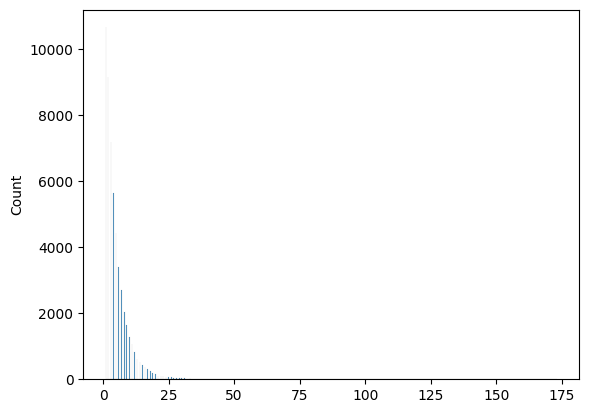

In [ ]:
import seaborn as sns
sns.histplot(doc_len_list)

We want that all sequences have the same length. According to the graph, 25 seems like a reasonable value:

In [ ]:
MAX_WORDS = 25

x_train_dl = sequence.pad_sequences(x_train_dl, maxlen=MAX_WORDS)
x_val_dl = sequence.pad_sequences(x_val_dl, maxlen=MAX_WORDS)
x_test_dl = sequence.pad_sequences(x_test_dl, maxlen=MAX_WORDS)

In [ ]:
x_train_dl.shape

(53711, 25)

In [ ]:
x_train_dl[0, :]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    1,   25,   23,  109,  146,  210, 7595,
        210,   62,  361], dtype=int32)

In [ ]:
total_words = len(token.word_index) + 1
total_words

13413

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

In [ ]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)


### Let's build the architecture
The first layer: an embedding layer. We want words that are similar to one another should have close values.

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, Flatten, Dense, Dropout


model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=16, input_length=MAX_WORDS))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(Conv1D(16, 3, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# Compile the model with a lower learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 16)            214608    
                                                                 
 conv1d_2 (Conv1D)           (None, 25, 32)            1568      
                                                                 
 conv1d_3 (Conv1D)           (None, 25, 16)            1552      
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               51328     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [ ]:
history = model.fit(x_train_dl, y_train, validation_data=(x_val_dl, y_val), epochs=15, batch_size=64, callbacks=[early_stopping])

Epoch 1/15
840/840 [==============================] - 19s 20ms/step - loss: 0.5571 - accuracy: 0.6805 - val_loss: 0.4934 - val_accuracy: 0.7343
Epoch 2/15
840/840 [==============================] - 8s 9ms/step - loss: 0.4562 - accuracy: 0.7608 - val_loss: 0.4916 - val_accuracy: 0.7364
Epoch 3/15
840/840 [==============================] - 10s 12ms/step - loss: 0.4070 - accuracy: 0.7903 - val_loss: 0.5151 - val_accuracy: 0.7326
Epoch 4/15
840/840 [==============================] - 8s 10ms/step - loss: 0.3667 - accuracy: 0.8122 - val_loss: 0.5407 - val_accuracy: 0.7370
Epoch 5/15
840/840 [==============================] - 6s 7ms/step - loss: 0.3372 - accuracy: 0.8268 - val_loss: 0.6310 - val_accuracy: 0.7286
Epoch 6/15
840/840 [==============================] - 6s 7ms/step - loss: 0.3111 - accuracy: 0.8395 - val_loss: 0.6791 - val_accuracy: 0.7277


Let's evaluate the model:

In [ ]:
loss, val_accuracy=model.evaluate(x_val_dl, y_val)
val_accuracy

210/210 [==============================] - 1s 3ms/step - loss: 0.4916 - accuracy: 0.7364


0.7363717555999756

In [ ]:
loss, train_accuracy = model.evaluate(x_train_dl, y_train)
train_accuracy

1679/1679 [==============================] - 6s 4ms/step - loss: 0.3959 - accuracy: 0.8034


0.803392231464386

As we expected, for our problem - a deep learning model is much more suitable than a logistic regression model.

## Functions to pipeline

Load test data

In [ ]:
test_df = pd.read_csv('https://raw.githubusercontent.com/odedovadia/AdvancedMLDLCourse/main/Assignments/Assignment%20II%20-%20NLP/test.csv')


In [ ]:
def pipline (test_df):

  # Apply the cleaning function to the 'Dialogue' column
  test_df['Dialogue'] = test_df['Dialogue'].apply(clean_dialogue)

  # Convert the 'dialogue' column to lowercase
  test_df['Dialogue'] = test_df['Dialogue'].str.lower()

  # lemmatize
  test_df = process_dataframe(test_df)

  # remove stop words
  test_df['Dialogue'] = test_df['Dialogue'].progress_apply(remove_stopwords)

  # remove special chars
  test_df['Dialogue'] = test_df['Dialogue'].apply(remove_special_characters)

  # handle multiple spaces
  test_df["Dialogue"] = test_df["Dialogue"].apply(lambda x: re.sub(r'\s+', ' ', x))

  test_df["Dialogue"] = test_df["Dialogue"].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))

  return test_df


test_df = pipline(test_df)


Lemmatizing:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4245 [00:00<?, ?it/s]

In [ ]:
test_df.head()

,Dialogue,Character,Episode,Show,Dialogue_length
0,oh god great smart brainy bright clever love t...,joey,Season-10 Episode-05-The One Where Rachel's Si...,Friends,30
1,listen sure dad care probably think funny tell...,monica,Season-07 Episode-03-The One With Phoebe’s Coo...,Friends,20
2,well could try go stuff put shoebox,george,S09E16,Seinfeld,18
3,yes verbal contract take word lose,kramer,S07E13,Seinfeld,20
4,um straighten shower curtain get mildew nice,monica,Season-02 Episode-18-The One Where Dr. Remore ...,Friends,17


# Deep Learning model prediction

In [ ]:
x_test=test_df['Dialogue']
y_test=test_df["Show"]

In [ ]:
x_test_dl = token.texts_to_sequences(x_test)
x_test_dl = sequence.pad_sequences(x_test_dl, maxlen=MAX_WORDS)


In [ ]:
predictions = model.predict(x_test_dl)

133/133 [==============================] - 0s 2ms/step


In [ ]:
# Convert float predictions to 1s and 0s based on the threshold
binary_predictions = (predictions > 0.5).astype(int)

In [ ]:
binary_predictions_text = np.where(binary_predictions == 0, 'Friends', 'Seinfeld')

In [ ]:
accuracy = accuracy_score(binary_predictions_text.ravel(), y_test.ravel())

In [ ]:
print(f'accuracy:{accuracy}')

accuracy:0.8091872791519434


It can be seen that the score on test data is higher than the score on  training data.

## Section 2
Let's Explore and plot results and see if our model is better at correctly classifying Seinfeld vs. Friends lines for specific characters.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have already trained and evaluated your model on the test set
# ...

# Reload the test set
x_test = test_df['Dialogue']
y_test = test_df['Show']
y_test_boolean_label = np.where(y_test=='Friends', 0, 1).ravel()

characters = test_df['Character'].unique()

# Create a dictionary to store accuracy scores for each character
accuracy_dict = {}

# Filter and evaluate accuracy for each character
for character in characters:
    # Filter test set for the specific character
    character_x = x_test_dl[test_df['Character'] == character]
    y_test_boolean_label_character = y_test_boolean_label[test_df['Character'] == character]

    # Make predictions on the filtered test set
    character_predictions = model.predict(character_x).ravel()
    binary_predictions = (character_predictions > 0.5).astype(int)
    # Evaluate accuracy for the specific character
    # print(y_test_boolean_label_character)
    # print(character_predictions)
    character_accuracy = accuracy_score(y_test_boolean_label_character, binary_predictions)

    # Store the accuracy in the dictionary
    accuracy_dict[character] = character_accuracy



10/10 [==============================] - 0s 2ms/step


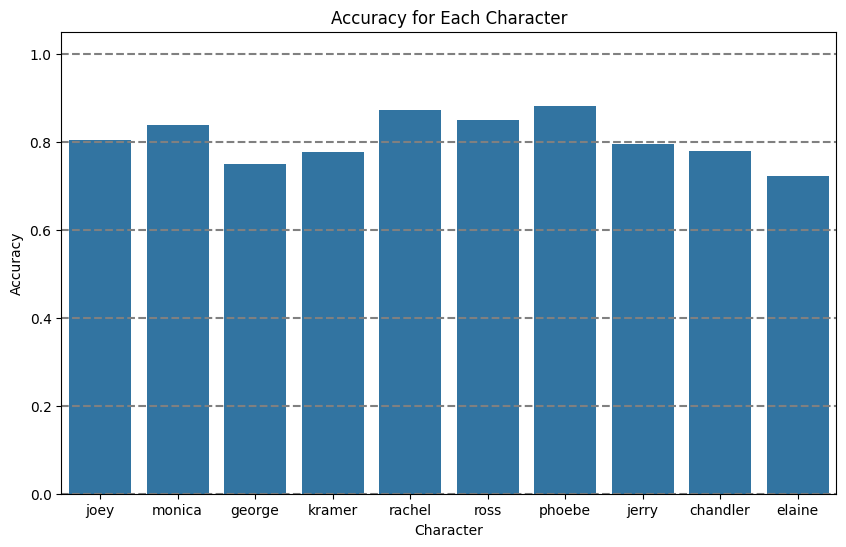

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a larger figure with specific dimensions
plt.figure(figsize=(10, 6))  # Adjust dimensions as needed

# Plot the data
sns.barplot(x=list(accuracy_dict.keys()), y=list(accuracy_dict.values()))

# Add titles and labels
plt.title("Accuracy for Each Character")
plt.xlabel("Character")
plt.ylabel("Accuracy")

# Draw horizontal lines at intervals of 0.2
for i in range(6):
    plt.axhline(y=i * 0.2, color='gray', linestyle='--')

# Show the plot
plt.show()


According to the graph you can see that it is easier for the model to predict characters of friends. We assume the reason is that there are more examples of "friends".

In [ ]:
import csv

# Define the data
data = {
    'test set accuracy': accuracy,
    'Your train set accuracy': train_accuracy,
    'Number of trainable parameters':  np.sum([np.prod(w.shape) for w in model.trainable_weights]),
    'Number of layers': len(model.layers),
    'Regularization methods': 'dropout, learning rate control',
    'Number of epochs': 15,
    'Choice of loss function': 'binary_crossentropy',
    'Choice of optimizer': 'Adam',
    'Embedding dimension (if used)': 25 }

with open('exercise3.csv', 'w', newline='') as csvfile:
    fieldnames = data.keys()
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerow(data)
